**PROJECT :** Employee Attrition Analysis in Data Science Training

**PROBLEM STATEMENT** **:** In the domain of employee attrition, a company specializing in Big Data and Data Science aims to predict which candidates, after completing training courses, are likely to join the company or seek new employment.

**DOMAIN :** Employee Attrition.

**CONTEXT :** The company collects demographic, educational, and professional background data from candidates during their course signup and enrollment processes. This prediction is crucial for optimizing training costs, improving course planning, and enhancing candidate categorization based on demographics, education, and prior experience data provided during enrollment.

**DATA DESCRIPTION :** Many people sign up for their training. The company wants to know which of these candidates want to work for the company after training or looking for new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education and experience is provided by candidates during signup and enrollment.

**COLUMNS DESCRIPTION :**

* **Enrollee_id:** Unique ID for candidate
* **City:** City code
* **City_development_index:** Developement index of the city (scaled)
* **Gender:** Gender of candidate
* **Relevent_experience:** Relevant experience of candidate
* **Enrolled_university:** Type of University course enrolled if any
* **Education_level:** Education level of candidate
* **Major_discipline:** Education major discipline of candidate
* **Experience:** Candidate total experience in years
* **Company_size:** No of employees in current employer's company
* **Company_type:** Type of current employer
* **Last_new_job:** Difference in years between previous job and current job
* **Training_hours:** training hours completed
* **Target:** 0 – Not looking for job change, 1 – Looking for a job change

**PROJECT OBJECTIVE :** The objective is to develop a predictive model(ML) that can accurately forecast whether a data scientist candidate will remain with the company or move to another job post-training. 

### Importing the libraries

In [1]:
## importing packages.
import numpy as np
import pandas as pd

# EDA
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Removing warnings.
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing.
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler

# Model building and tuning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import xgboost as xgb
from lightgbm  import LGBMClassifier
from catboost import CatBoostClassifier

# Balancing the data.
import imblearn
from imblearn.over_sampling import SMOTE

#### Data Loading

In [2]:
data = pd.read_csv(r'C:\Users\Jupally Pavan Kumar\Downloads\aug_train.csv\aug_train.csv')
data.shape

(19158, 14)

- There are 19158 records in the dataset with 14 features.

In [3]:
 data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,2,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,3,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,4,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,5,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [4]:
data.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,19154,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1
19154,19155,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1
19155,19156,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0
19156,19157,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0
19157,19158,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0


**Step-1:** Data Preprocessing.

In [5]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [6]:
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [7]:
pd.DataFrame({'Counts':data.isnull().sum()[data.isnull().sum()>0], 
             'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Counts,Percentage
gender,4508,23.530640
enrolled_university,386,2.014824
education_level,460,2.401086
major_discipline,2813,14.683161
experience,65,0.339284
company_size,5938,30.994885
company_type,6140,32.049274
last_new_job,423,2.207955


- The above columns have missing values in the dataset.
- 'company_size' and 'company_type' columns has 31% of missing values approximately.

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,9579.500000,5530.582564,1.000,4790.25,9579.500,14368.75,19158.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


- Except enrollee_id and target variable, there are only two numerical features in the dataset.
- 75% of the people completed training in 88 hours but some people took 336 hours.
- Data should be scaled.

- Let's see the distribution of other columns which has missing values with EDA, then treat those missing values with a suitable approach.
- We don't need 'enrollee_id' feature for model building, so we can drop this column.

In [10]:
data.drop('enrollee_id', axis = 1, inplace = True)

- Let's print all the value_counts for the object dtypes

In [11]:
object_columns = list(data.select_dtypes(['object']).columns)

In [12]:
data.nunique()

city                      123
city_development_index     93
gender                      3
relevent_experience         2
enrolled_university         3
education_level             5
major_discipline            6
experience                 22
company_size                8
company_type                6
last_new_job                6
training_hours            241
target                      2
dtype: int64

In [13]:
# Function to print value_counts of object features.
def values(column):
    return data[column].value_counts().to_string()
for column in object_columns:
    print(f"The unique values for the column : ", values(column))
    print('*'*50, '\n')

The unique values for the column :  city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
city_136     586
city_67      431
city_75      305
city_102     304
city_104     301
city_73      280
city_100     275
city_71      266
city_11      247
city_90      197
city_61      197
city_28      192
city_23      182
city_65      175
city_36      160
city_173     151
city_83      143
city_50      140
city_116     128
city_46      128
city_162     128
city_138     120
city_19      119
city_64      114
city_45      113
city_97      104
city_74      104
city_57      103
city_149     102
city_159      94
city_99       94
city_128      92
city_41       89
city_10       86
city_165      82
city_98       79
city_105      79
city_123      79
city_101      75
city_40       68
city_89       67
city_150      65
city_145      63
city_24       62
city_115      54
city_142      53
city_152      51
city_76       50
city_158      49
city_13       48
city_27       47
city_91

In [14]:
target_counts = pd.DataFrame({'Target':[0,1], 'counts' : data['target'].value_counts(), 'percentage':data['target'].value_counts(normalize = True)*100})
print(target_counts.to_string(index=False))

 Target  counts  percentage
      0   14381   75.065247
      1    4777   24.934753


- The values in the target column are imbalanced.

### EXPLORATORY DATA ANALYSIS

#### UNIVARIATE ANALYSIS

In [15]:
# Let's create a function which prints histogram and boxplot.
def histplot_boxplot(data, feature, kde=True, figsize = (8, 4), bins=None):
    f2,(ax_box, ax_hist) = plt.subplots(
        sharex = True,
        nrows = 2,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize = figsize
    )
    sns.boxplot(data[feature], ax = ax_box, color = 'blue', orient = 'h', showmeans = True)
    sns.histplot(data[feature], ax = ax_hist, color = 'green', kde = True)
    ax_hist.axvline(data[feature].mean(), color = 'green')
    ax_hist.axvline(data[feature].median(), color = 'brown', label = 'median')

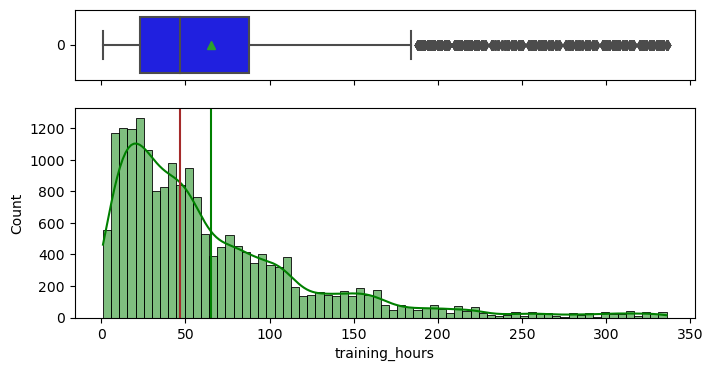

In [16]:
histplot_boxplot(data, 'training_hours', kde = True)

- From the plot, we observe that the measures of central tendency with respect to training hours seem to be 70, despite a maximum value over 300 hours. So most of the people in this dataset have undergone traning for less than 100 hours.

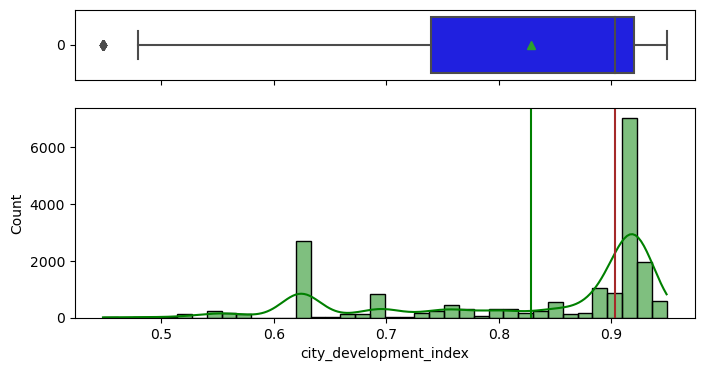

In [17]:
histplot_boxplot(data, 'city_development_index')

### Observations

- From the above plot, we observe that there are many people from cities having a development index more than 0.9.

#### Function to show the barchart

In [18]:
def labeled_barchart(data, column, palette='Paired', bar_width=0.5, n = None):
    
    total = len(data[column])  # length of the column
    count = data[column].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 4))
    else:
        plt.figure(figsize=(n + 1, 4))
        
    ax = sns.countplot(data=data, x=column, palette=palette)
    
    for container in ax.containers:
        ax.bar_label(container)
    # Adjusting the bar width
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - bar_width

        # Changing the bar width
        patch.set_width(bar_width)

        # Recentering the bar
        patch.set_x(patch.get_x() + diff * 0.5)

    plt.xticks(rotation=90)
    plt.show()

- Let's use the above function to plot the graphs.

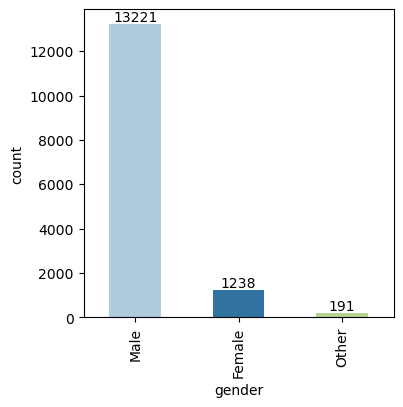

In [19]:
labeled_barchart(data, 'gender')

- From the above graph, we can see that 'gender' feature is a male skewed.
- Most of the records are of 'male' employees and other type records are very less.

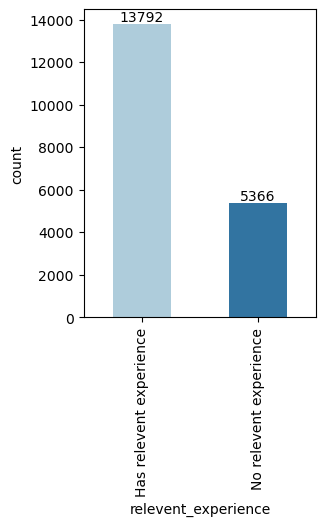

In [20]:
labeled_barchart(data, 'relevent_experience')

- This column is a binary classification class : (i) Has relevent experience, (ii) No relevent experience.
- Most of the people have relevent work experience.

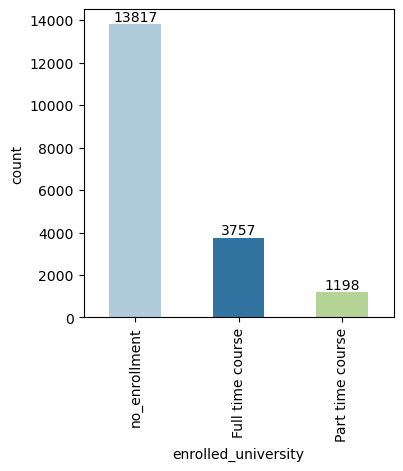

In [21]:
labeled_barchart(data, 'enrolled_university')

- There are most of the people who are not enrolled in any university(13817).
- Part time course records are less number of records in the data.

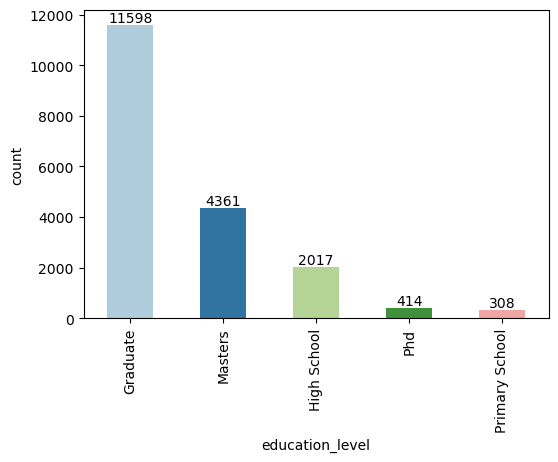

In [22]:
labeled_barchart(data, 'education_level')

- 11598 people has completed their Graduation and primary school members are also recorded.
- There only 414 people who completed their Phd.

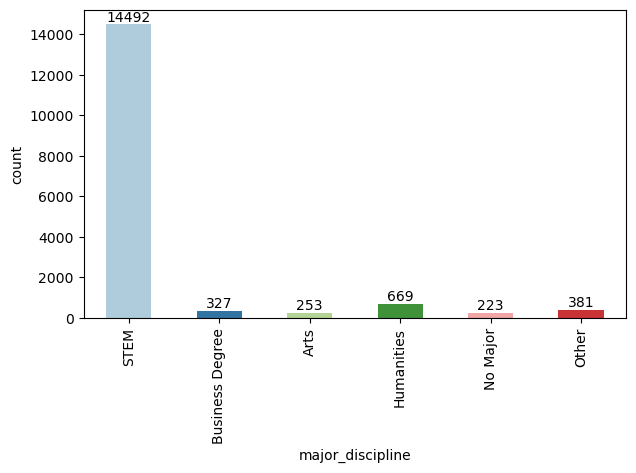

In [23]:
labeled_barchart(data, 'major_discipline')

- Most preferred major_discipline of a candiadte is STEM.

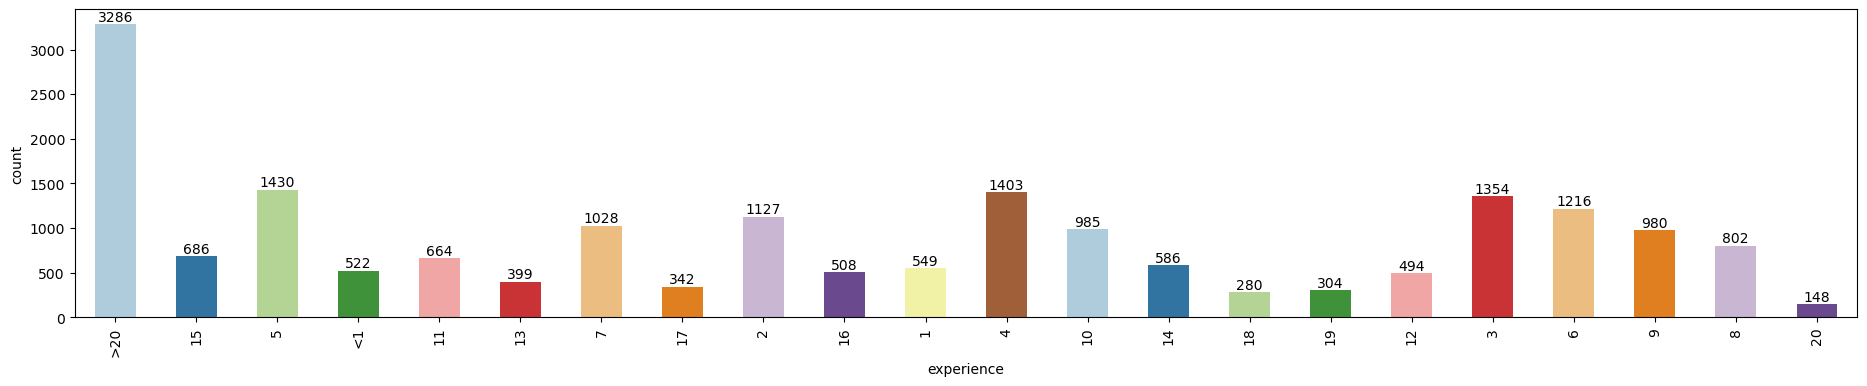

In [24]:
labeled_barchart(data, 'experience')

- 3286 people has work experience of greater than 20 years.
- 522 candidates has no experience previously.

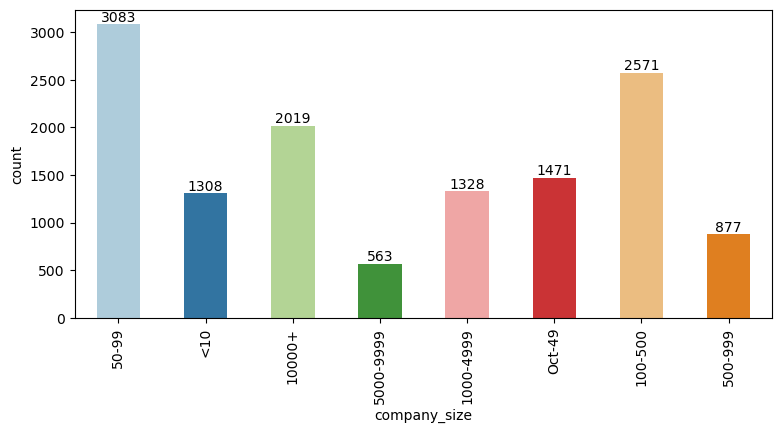

In [25]:
labeled_barchart(data, 'company_size')

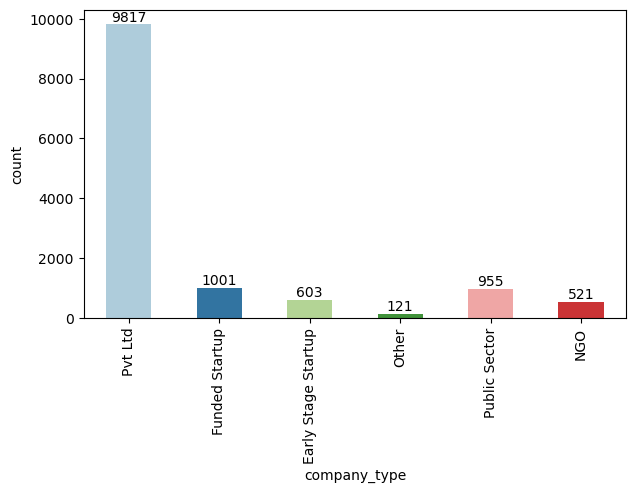

In [26]:
labeled_barchart(data, 'company_type')

- 9817 candidates are working in pvt Ltd comapnies.

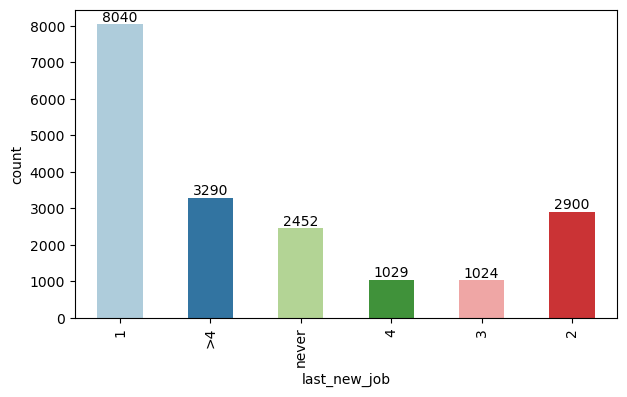

In [27]:
labeled_barchart(data,'last_new_job')

- 8040 candidates are working in current company since last one year.
- 2452 people has not been working or they might not worked in any company.

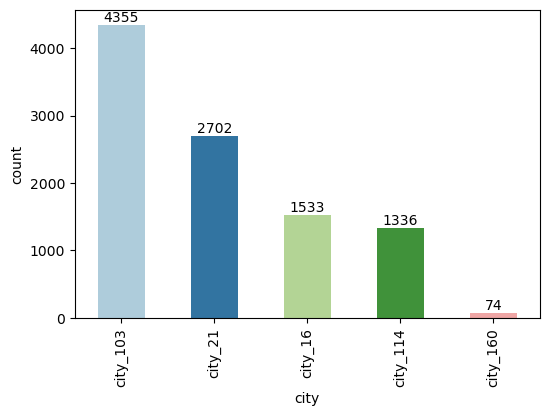

In [28]:
CityCounts = data.copy(deep = True)
city_counts = CityCounts['city'].value_counts()
CityCounts['city_counts'] = CityCounts['city'].map(city_counts)
labeled_barchart(CityCounts.sort_values(by = 'city_counts', ascending = False).head(10000),'city')

- There are 4355 candidates are from the 'City_103' and 2702 from 'City_2702'.
- Most of the candidates are from these four cities[City_103, City_21, City_16, City_114]

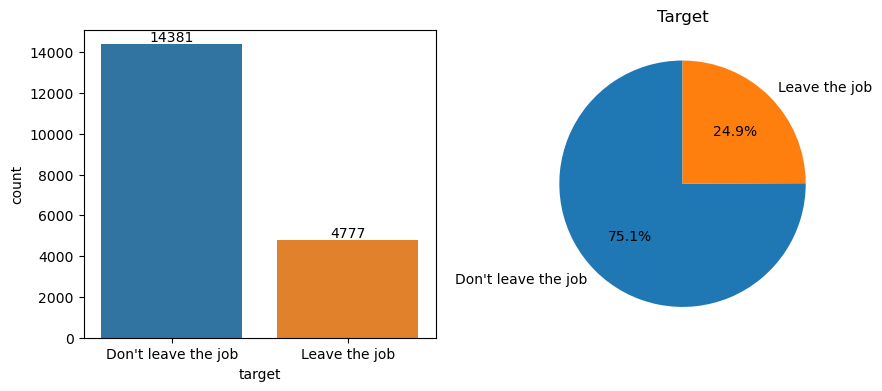

In [29]:
plt.figure(figsize = (10,4))
plt.subplot(121)
ax = sns.countplot(data=data, x='target')
ax.set_xticklabels(["Don't leave the job", 'Leave the job'])
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(122)
plt.title("Target")
plt.pie(data['target'].value_counts(), labels = ["Don't leave the job", 'Leave the job'],autopct='%1.1f%%', startangle=90);

- From the above countplot, we can observe that the data is not balanced as 'class_0' has occupied most of the records in the target variable.

### BIVARIATE ANALYSIS

In [30]:
def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

target      0     1    All
gender                    
All     11262  3388  14650
Male    10209  3012  13221
Female    912   326   1238
Other     141    50    191
------------------------------------------------------------------------------------------------------------------------


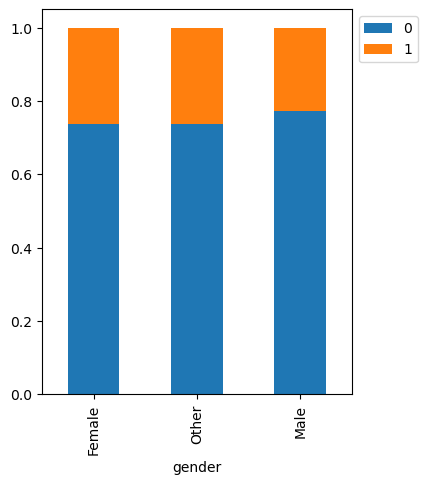

In [31]:
stacked_barplot(data, 'gender', 'target')

- Both 'Females' and 'others' has the same distribution w.r.t target variable.
- But there is no such significant influence over 'Target' class by these column.

target                   0     1    All
enrolled_university                    
All                  14118  4654  18772
no_enrollment        10896  2921  13817
Full time course      2326  1431   3757
Part time course       896   302   1198
------------------------------------------------------------------------------------------------------------------------


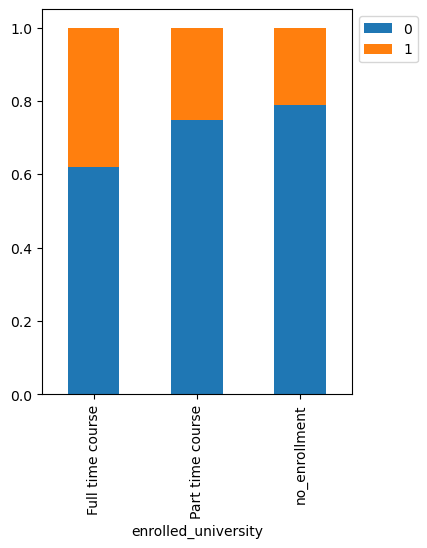

In [32]:
stacked_barplot(data, 'enrolled_university', 'target')

- From the above chart, we can infer that candidates who enrolled for Full time course are most likely to Leave their current job comparing with the other categories.

target               0     1    All
education_level                    
All              14025  4673  18698
Graduate          8353  3245  11598
Masters           3426   935   4361
High School       1623   394   2017
Phd                356    58    414
Primary School     267    41    308
------------------------------------------------------------------------------------------------------------------------


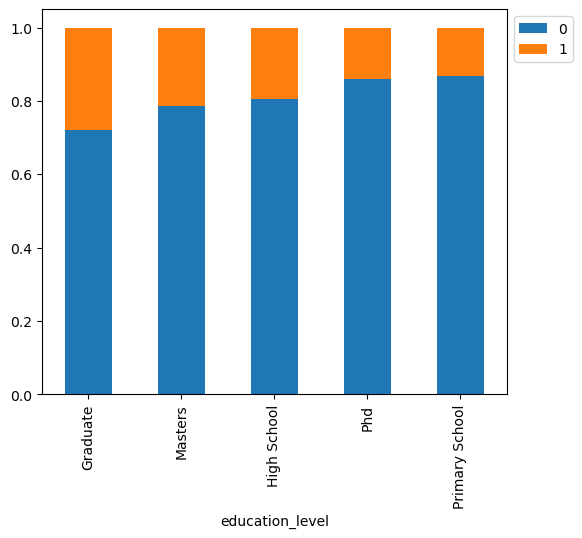

In [33]:
stacked_barplot(data, 'education_level', 'target')

target                0     1    All
major_discipline                    
All               12117  4228  16345
STEM              10701  3791  14492
Humanities          528   141    669
Other               279   102    381
Business Degree     241    86    327
No Major            168    55    223
Arts                200    53    253
------------------------------------------------------------------------------------------------------------------------


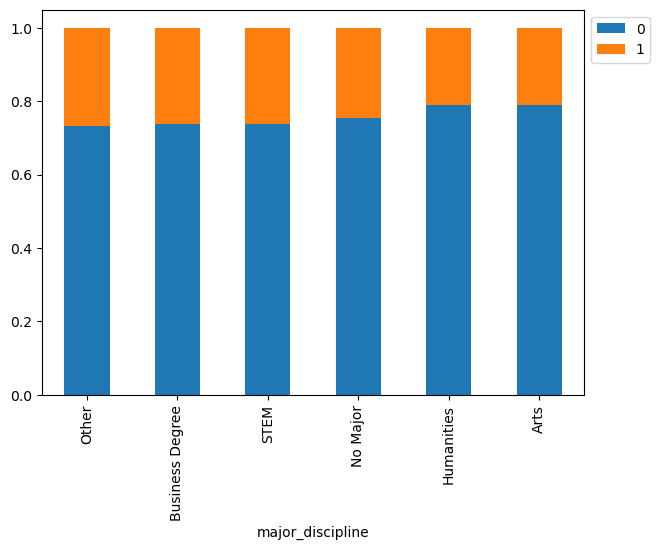

In [34]:
stacked_barplot(data, 'major_discipline', 'target')

- Employees who took STEM or Business Degrees as their major discipline are slightly more likely to change their job.

target          0     1    All
experience                    
All         14339  4754  19093
>20          2783   503   3286
3             876   478   1354
4             946   457   1403
5            1018   412   1430
2             753   374   1127
6             873   343   1216
7             725   303   1028
<1            285   237    522
1             316   233    549
9             767   213    980
10            778   207    985
8             607   195    802
11            513   151    664
15            572   114    686
14            479   107    586
12            402    92    494
13            322    77    399
16            436    72    508
17            285    57    342
19            251    53    304
18            237    43    280
20            115    33    148
------------------------------------------------------------------------------------------------------------------------


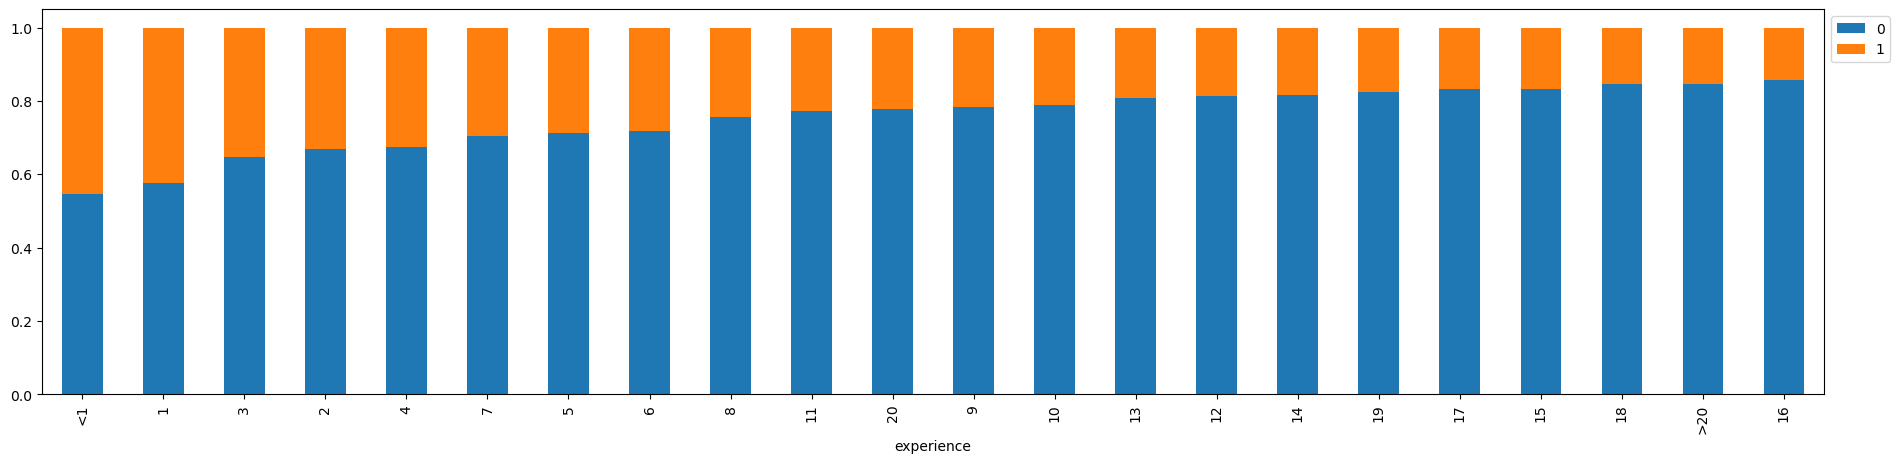

In [35]:
stacked_barplot(data, 'experience', 'target')

- From the above plot, it's clear that employees having a work experience of less than 3 years are trying to switch their jobs.

target            0     1    All
last_new_job                    
All           14112  4623  18735
1              5915  2125   8040
never          1713   739   2452
2              2200   700   2900
>4             2690   600   3290
3               793   231   1024
4               801   228   1029
------------------------------------------------------------------------------------------------------------------------


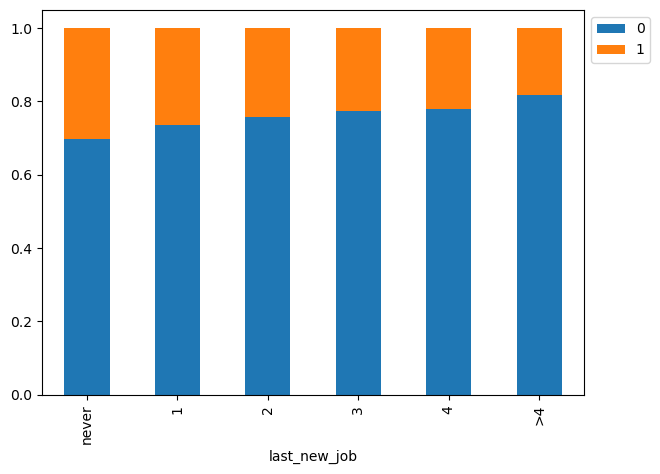

In [36]:
stacked_barplot(data, 'last_new_job', 'target')

- Employees who have never switched their job before are the most likely to be looking for a job change.

In [37]:
data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


- Let's impute all the missing values in each feature with it's mode() since only categorical variables contains the missing values.

In [38]:
# Removing city column.
data.drop(['gender','city'], axis = 1, inplace = True)

In [39]:
columns_to_impute = [col for col in object_columns if col !='gender' and col !='city']

imputer = SimpleImputer(strategy = 'most_frequent')
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

In [40]:
data.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0
3,0.789,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [41]:
data.isnull().sum()

city_development_index    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

- All missing values are trated sucessfully.

### Separating Predictors and Target columns.

In [42]:
X = data.drop('target', axis = 1)
y = data['target']

In [43]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.40, random_state = 42, stratify = y)
X_test, X_validation, y_test, y_validation = train_test_split(X_temp, y_temp, test_size = 0.50, random_state = 42, stratify = y_temp)
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"X_validation shape : {X_validation.shape}")

X_train shape : (11494, 10)
X_test shape : (3832, 10)
X_validation shape : (3832, 10)


In [44]:
y_train.value_counts()

target
0    8628
1    2866
Name: count, dtype: int64

### Encoding the labels

In [45]:
# Initializing the encoder object.
encoder = LabelEncoder()

#Encoding manually for binary class categorical features.
X_train['relevent_experience'] = X_train['relevent_experience'].replace({'Has relevent experience':1,  'No relevent experience':0})
X_test['relevent_experience'] = X_test['relevent_experience'].replace({'Has relevent experience':1,  'No relevent experience':0})
X_validation['relevent_experience'] = X_validation['relevent_experience'].replace({'Has relevent experience':1,  'No relevent experience':0})

In [46]:
#Function to encode all the categorical classes.
def columns_encoding(X_train, X_test, X_validation, column):
    X_train[column] = encoder.fit_transform(X_train[column])
    X_test[column] = encoder.transform(X_test[column])    
    X_validation[column] = encoder.transform(X_validation[column]) 

for column in columns_to_impute:
    columns_encoding(X_train, X_test, X_validation, column)

In [47]:
X_train.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
2185,0.624,1,2,0,5,11,3,5,1,214
8089,0.920,0,2,4,5,14,3,5,5,6
6729,0.920,1,2,0,5,1,3,5,4,91
7696,0.579,0,0,1,5,13,6,0,1,9
15045,0.920,1,2,2,5,21,3,5,1,80


In [48]:
X_test.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
9384,0.920,1,2,0,5,14,3,5,0,12
9409,0.910,0,1,0,5,13,1,4,4,84
671,0.920,1,2,0,2,14,0,5,0,90
1421,0.920,1,2,0,5,21,6,5,4,42
16779,0.624,1,2,0,5,14,0,5,1,12


In [49]:
X_validation.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
4050,0.920,1,2,0,5,19,2,5,3,96
14628,0.878,1,2,2,5,6,0,5,0,60
5661,0.920,0,2,0,5,21,3,5,0,32
8137,0.897,1,2,0,5,21,7,5,0,21
5828,0.666,1,2,0,5,1,3,5,1,5


In [50]:
scaler = StandardScaler()

X_train_scaled  = X_train 
X_test_scaled = X_test
X_validation_scaled = X_validation

X_train_scaled.iloc[:,1:] = scaler.fit_transform(X_train_scaled.iloc[:,1:])
X_test_scaled.iloc[:, 1:] = scaler.transform(X_test_scaled.iloc[:,1:])
X_validation_scaled.iloc[:, 1:] = scaler.transform(X_validation_scaled.iloc[:,1:])

In [51]:
X_train_scaled.head(3)

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
2185,0.624,0.618187,0.563126,-0.695991,0.295056,-0.289785,0.015783,0.392742,-0.391452,2.502028
8089,0.920,-1.617634,0.563126,3.311383,0.295056,0.162051,0.015783,0.392742,1.676977,-0.992184
6729,0.920,0.618187,0.563126,-0.695991,0.295056,-1.795906,0.015783,0.392742,1.159870,0.435739


In [52]:
X_test_scaled.head(3)

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
9384,0.92,0.618187,0.563126,-0.695991,0.295056,0.162051,0.015783,0.392742,-0.908559,-0.891390
9409,0.91,-1.617634,-0.694417,-0.695991,0.295056,0.011439,-1.029777,-0.382091,1.159870,0.318145
671,0.92,0.618187,0.563126,-0.695991,-2.876426,0.162051,-1.552557,0.392742,-0.908559,0.418940


In [53]:
X_validation_scaled.head(3)

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
4050,0.920,0.618187,0.563126,-0.695991,0.295056,0.915112,-0.506997,0.392742,0.642762,0.519734
14628,0.878,0.618187,0.563126,1.307696,0.295056,-1.042845,-1.552557,0.392742,-0.908559,-0.085033
5661,0.920,-1.617634,0.563126,-0.695991,0.295056,1.216336,0.015783,0.392742,-0.908559,-0.555408


In [54]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_transformed = pca.fit_transform(X_train_scaled)
explained_variance = pca.explained_variance_ratio_
cumsum = np.cumsum(explained_variance)
print(explained_variance)

[0.16167243 0.13680224 0.11783514 0.11249901 0.11075229 0.10860017
 0.10191704 0.08580506 0.06250788 0.00160874]


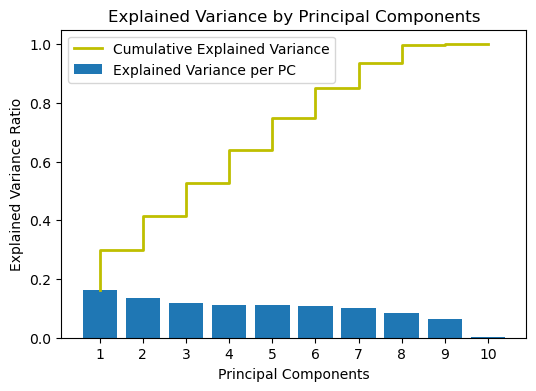

In [55]:
# Plotting
plt.figure(figsize=(6,4))

# Plotting cumulative explained variance.
plt.step(range(1, len(cumsum) + 1), cumsum, color='y', linestyle='-', linewidth=2, label='Cumulative Explained Variance')

# Plotting individual explained variance.
plt.bar(range(1, len(explained_variance) + 1), explained_variance, align='center', label='Explained Variance per PC')

plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.legend()
plt.show()

- From the above analysis, all the 10 components are useful to explain the variance in the data.
- SO, let's use the original scaled data for model building.

### Resampling the data

In [56]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
print(X_train_balanced.shape)
print(y_train_balanced.shape)

(17256, 10)
(17256,)


### MODEL BUILDING

### Functions to print metrics and confusion matrix

In [57]:
#Function to print classification metrics.
def print_metrics(actual, predicted):
    Accuracy = accuracy_score(actual, predicted)
    Precision = precision_score(actual, predicted)
    Recall = recall_score(actual, predicted)
    F1_score = f1_score(actual, predicted)
    AUC = roc_auc_score(actual, predicted)
    return Accuracy, Precision, Recall, F1_score, AUC


#Extracting the scores.
def model_scores(scores):
    labels_ = ['Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC']
    for label, score in zip(labels_, scores):
        print(f"{label} : {score}")

#Function for confusion matrix plotting.
def confusion_matrix_(actual_train, predicted_train,actual_test, predicted_test):
    cm_1 = confusion_matrix(actual_train, predicted_train)
    cm_1 = pd.DataFrame(cm_1, index = ["Actual_0", "Actual_1"], columns = ['Pred_0', "Pred_1"])
    cm_2 = confusion_matrix(actual_test, predicted_test)
    cm_2 = pd.DataFrame(cm_2, index = ["Actual_0", "Actual_1"], columns = ['Pred_0', "Pred_1"])
    plt.figure(figsize = (5,3))
    plt.subplot(121)
    sns.heatmap(cm_1, annot = True, cbar = False, fmt = 'd', cmap='Reds')
    plt.title("Training")
    plt.subplot(122)
    sns.heatmap(cm_2, annot = True, cbar = False, fmt = 'd', cmap='Reds')
    plt.yticks([])  
    plt.title("Testing")
    plt.tight_layout()

#Function for AUC_ROC_CUVE plotting.
def roc_plot(actual, predicted):
    fpr, tpr, thresholds = roc_curve(actual, predicted)
    plt.figure(figsize = (5,3))
    plt.plot(fpr, tpr, color = 'r')
    plt.title("AUC_ROC_CURVE")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [58]:
#Model Building and scores printing.
def model_training(model, X_train, y_train, X_test, y_test, validation = False):
    model = model
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    #Priniting the metrics.
    print("Training data scores\n ")
    scores =  print_metrics(y_train, y_pred_train)
    model_scores(scores)
    print('*'*50)
    print("Testing data scores \n ")
    scores =  print_metrics(y_test, y_pred_test)
    model_scores(scores)
    confusion_matrix_(y_train, y_pred_train, y_test, y_pred_test)
    roc_plot(y_test, y_pred_test)
    return model
    
#Model Tuning   
def grid_searchCV(X_train, y_train, X_test, y_test,  estimator, param_grid, cv = 5, random_state = 42):
    grid_search = GridSearchCV(estimator = estimator, scoring = 'f1', param_grid = param_grid, cv = cv)
    grid_search.fit(X_train, y_train)
    print(f"Best_parameters are : {grid_search.best_params_}")
    y_pred_train = grid_search.predict(X_train)
    y_pred_test = grid_search.predict(X_test)
    #Priniting the metric.
    print("Training data scores\n ")
    scores =  print_metrics(y_train_balanced, y_pred_train)
    model_scores(scores)
    print('*'*50)
    print("Testing data scores \n ")
    scores =  print_metrics(y_test, y_pred_test)
    model_scores(scores)
    confusion_matrix_(y_train, y_pred_train,y_test, y_pred_test)
    return grid_search
    
    
def random_searchCV(X_train, y_train, X_test, y_test,  estimator, param_grid, n_iter = 10, cv = 5, random_state = 42):
    random_search = RandomizedSearchCV(estimator = estimator, scoring = 'f1', param_distributions = param_grid, n_iter = n_iter,cv = cv)
    random_search.fit(X_train, y_train)
    y_pred_train = random_search.predict(X_train)
    y_pred_test = random_search.predict(X_test)
    #Priniting the metric.
    print("Training data scores\n ")
    scores =  print_metrics(y_train_balanced, y_pred_train)
    model_scores(scores)
    print('*'*50)
    print("Testing data scores \n ")
    scores =  print_metrics(y_test, y_pred_test)
    model_scores(scores)
    confusion_matrix_(y_train, y_pred_train,y_test, y_pred_test)
    return random_search
    
    
def scores_container(name, scores):
    df = pd.DataFrame(index = ['Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC'])
    df[name] = scores
    return df

def validation_scores(model, X, y):
    y_pred = model.predict(X)
    scores = print_metrics(y, y_pred)
    print('*'*50)
    print(f"Validation Scores are  \n ")
    model_scores(scores)

Training data scores
 
Accuracy : 0.7020166898470097
Precision : 0.7166832421680756
Recall : 0.6681733889661567
F1_score : 0.6915786948176583
AUC : 0.7020166898470098
**************************************************
Testing data scores 
 
Accuracy : 0.7056367432150313
Precision : 0.43909348441926344
Recall : 0.6485355648535565
F1_score : 0.5236486486486487
AUC : 0.6865765445964583


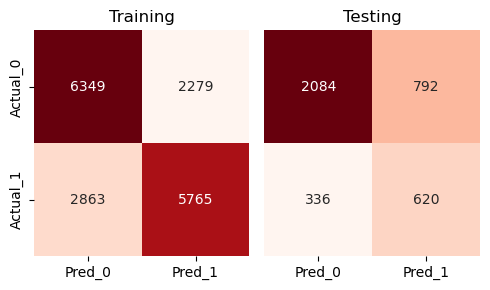

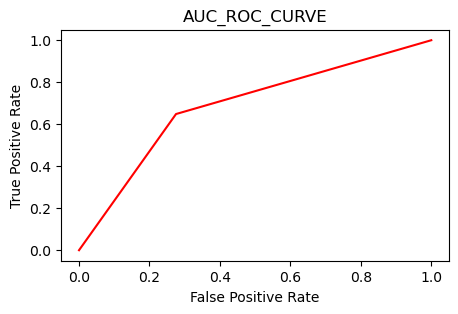

In [59]:
#Initializing the LogisticRegression model.
lr = LogisticRegression(random_state = 42)
model  = model_training(lr, X_train_balanced, y_train_balanced, X_test_scaled, y_test)

In [60]:
validation_scores(model, X_validation, y_validation)

**************************************************
Validation Scores are  
 
Accuracy : 0.7147703549060542
Precision : 0.44970845481049565
Recall : 0.6460732984293194
F1_score : 0.5302965191233348
AUC : 0.6918235800453861


Best_parameters are : {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Training data scores
 
Accuracy : 0.7018428372739917
Precision : 0.7163085331014781
Recall : 0.6684051923968475
F1_score : 0.6915282690808802
AUC : 0.7018428372739917
**************************************************
Testing data scores 
 
Accuracy : 0.7051148225469729
Precision : 0.43847241867043846
Recall : 0.6485355648535565
F1_score : 0.5232067510548524
AUC : 0.6862288394504222


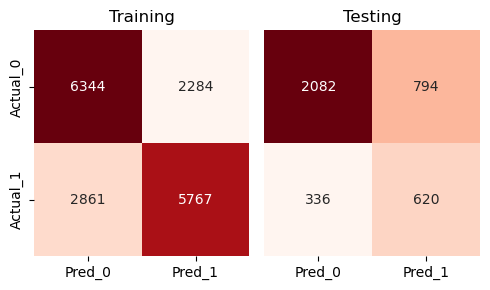

In [61]:
logi_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag'],  
    'penalty': ['l1', 'l2'],
}

model = grid_searchCV(X_train_balanced, y_train_balanced, X_test_scaled, y_test, LogisticRegression(random_state = 42), logi_param_grid)

In [62]:
validation_scores(model, X_validation, y_validation)

**************************************************
Validation Scores are  
 
Accuracy : 0.7139874739039666
Precision : 0.44872727272727275
Recall : 0.6460732984293194
F1_score : 0.5296137339055794
AUC : 0.691302203611601


### KNN Model

Training data scores
 
Accuracy : 0.8365206305053314
Precision : 0.7871624962911681
Recall : 0.922461752433936
F1_score : 0.8494583488980202
AUC : 0.8365206305053314
**************************************************
Testing data scores 
 
Accuracy : 0.6098643006263048
Precision : 0.3333333333333333
Recall : 0.5638075313807531
F1_score : 0.41896618732996505
AUC : 0.5944906919768856


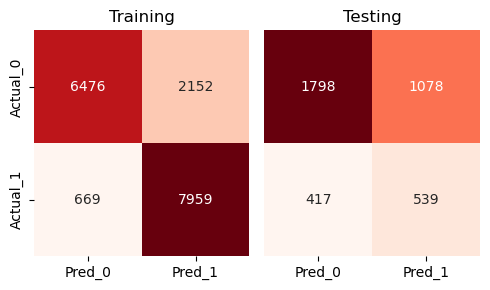

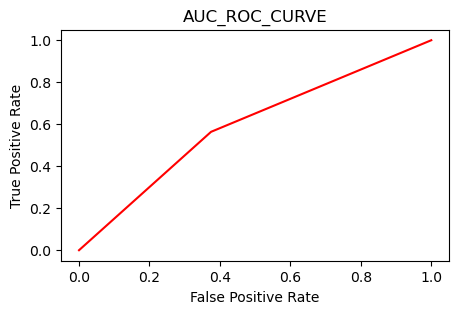

In [63]:
knn = KNeighborsClassifier()
model = model_training(knn, X_train_balanced, y_train_balanced, X_test_scaled, y_test)

In [64]:
validation_scores(model, X_validation, y_validation)

**************************************************
Validation Scores are  
 
Accuracy : 0.615866388308977
Precision : 0.339938080495356
Recall : 0.574869109947644
F1_score : 0.4272373540856031
AUC : 0.6021721288354834


### Hyper parameters tuning

Best_parameters are : {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Training data scores
 
Accuracy : 0.9986091794158554
Precision : 1.0
Recall : 0.9972183588317107
F1_score : 0.9986072423398329
AUC : 0.9986091794158554
**************************************************
Testing data scores 
 
Accuracy : 0.6495302713987474
Precision : 0.35591958302308263
Recall : 0.5
F1_score : 0.4158329708568943
AUC : 0.5996175243393602


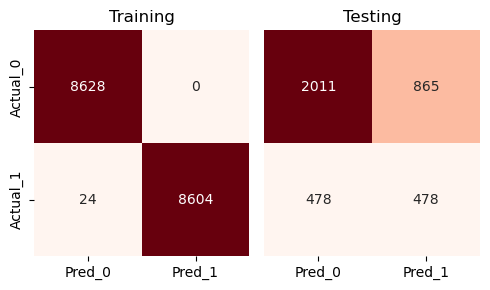

In [65]:
knn_param_grid = {
     'n_neighbors': range(5, 20, 2),
     'weights' : ['distance', 'uniform'],
     'metric' : ['euclidean', 'chebyshev', 'manhattan']
}

model = grid_searchCV(X_train_balanced, y_train_balanced, X_test_scaled, y_test, KNeighborsClassifier(), knn_param_grid)

In [66]:
validation_scores(model, X_validation, y_validation)

**************************************************
Validation Scores are  
 
Accuracy : 0.6484864300626305
Precision : 0.3545994065281899
Recall : 0.5005235602094241
F1_score : 0.4151107251411203
AUC : 0.599062614307006


###  Decision Tree Classifier

Training data scores
 
Accuracy : 0.9986091794158554
Precision : 1.0
Recall : 0.9972183588317107
F1_score : 0.9986072423398329
AUC : 0.9986091794158554
**************************************************
Testing data scores 
 
Accuracy : 0.6951983298538622
Precision : 0.40518783542039355
Recall : 0.47384937238493724
F1_score : 0.43683702989392476
AUC : 0.621312725135445


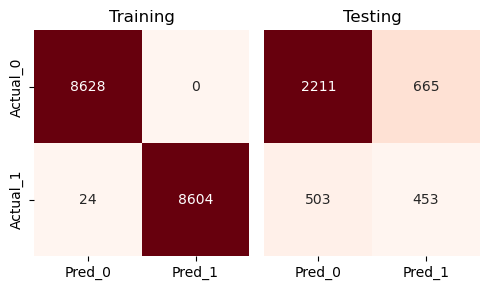

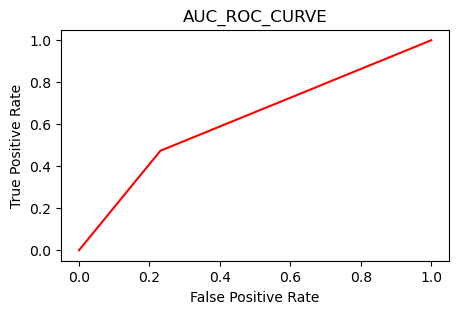

In [67]:
tree = DecisionTreeClassifier()
model = model_training(tree, X_train_balanced, y_train_balanced, X_test_scaled, y_test)

In [68]:
validation_scores(model, X_validation, y_validation)

**************************************************
Validation Scores are  
 
Accuracy : 0.68919624217119
Precision : 0.39810017271157166
Recall : 0.4827225130890052
F1_score : 0.43634642688121156
AUC : 0.6202281317617427


Best_parameters are : {'ccp_alpha': 0.001, 'class_weight': {1: 0.55, 0: 0.45}, 'max_depth': 8, 'min_samples_leaf': 30}
Training data scores
 
Accuracy : 0.7495363931386184
Precision : 0.7330591037021
Recall : 0.7848864163189615
F1_score : 0.7580879883577746
AUC : 0.7495363931386184
**************************************************
Testing data scores 
 
Accuracy : 0.7077244258872651
Precision : 0.44829760403530894
Recall : 0.7437238493723849
F1_score : 0.5594020456333596
AUC : 0.719740923295372


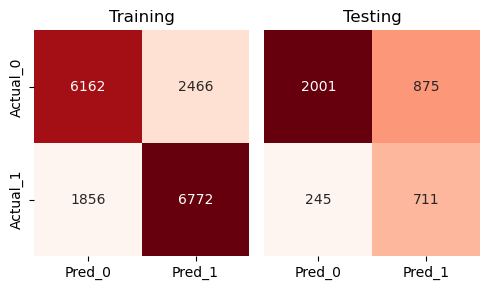

In [69]:
tree_param_grid = {
    'max_depth' : [3,4,5,6, 8, 10],
    'ccp_alpha':[0.001, 0.01, 0.1, 1],
    'min_samples_leaf':[30,40,50],
    'class_weight' : [{1:0.55, 0:0.45}]
}
model = grid_searchCV(X_train_balanced, y_train_balanced, X_test_scaled, y_test, DecisionTreeClassifier(), tree_param_grid)

In [70]:
validation_scores(model, X_validation, y_validation)

**************************************************
Validation Scores are  
 
Accuracy : 0.717901878914405
Precision : 0.45788770053475936
Recall : 0.7172774869109948
F1_score : 0.5589555283557731
AUC : 0.7176933141889003


Training data scores
 
Accuracy : 0.9984353268428373
Precision : 0.9986086956521739
Recall : 0.9982614742698191
F1_score : 0.9984350547730829
AUC : 0.9984353268428373
**************************************************
Testing data scores 
 
Accuracy : 0.7374739039665971
Precision : 0.47469635627530365
Recall : 0.4905857740585774
F1_score : 0.4825102880658436
AUC : 0.6550634016329049


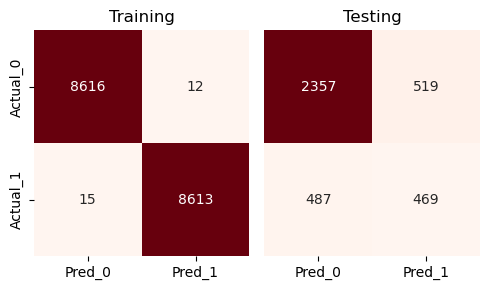

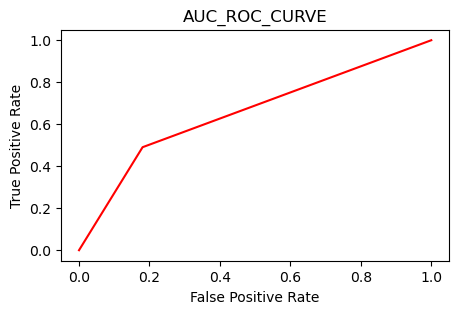

In [71]:
forest = RandomForestClassifier(n_estimators = 50)
model = model_training(forest, X_train_balanced, y_train_balanced, X_test_scaled, y_test)

In [72]:
validation_scores(model, X_validation, y_validation)

**************************************************
Validation Scores are  
 
Accuracy : 0.7544363256784968
Precision : 0.5074152542372882
Recall : 0.5015706806282723
F1_score : 0.5044760400210637
AUC : 0.6699719930774312


Training data scores
 
Accuracy : 0.720503013444599
Precision : 0.6683181456250553
Recall : 0.8755215577190543
F1_score : 0.75801515227535
AUC : 0.720503013444599
**************************************************
Testing data scores 
 
Accuracy : 0.6189979123173278
Precision : 0.37988560533841753
Recall : 0.8336820083682008
F1_score : 0.5219384413883431
AUC : 0.6906588066875775


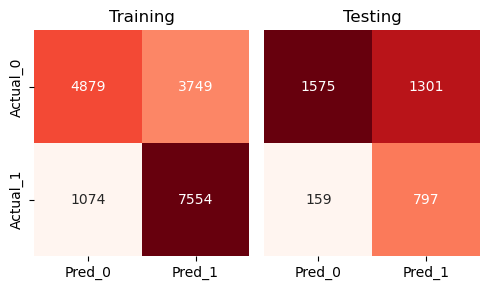

In [73]:
forest_param_grid = {
    'n_estimators' : [100, 150, 300, 500],
    'max_depth' : [2,3,4],
    'min_samples_split' : [100,200,500],
    'class_weight' : [{1 : 0.60, 0 : 0.40}]
}
model = random_searchCV(X_train_balanced, y_train_balanced, X_test_scaled, y_test, RandomForestClassifier(), forest_param_grid)

In [74]:
validation_scores(model, X_validation, y_validation)

**************************************************
Validation Scores are  
 
Accuracy : 0.6283924843423799
Precision : 0.3858880778588808
Recall : 0.8303664921465969
F1_score : 0.5269102990033223
AUC : 0.6958575595943273


Training data scores
 
Accuracy : 0.7281525266573945
Precision : 0.7400902549091353
Recall : 0.703291608715809
F1_score : 0.7212218458429904
AUC : 0.7281525266573945
**************************************************
Testing data scores 
 
Accuracy : 0.7171189979123174
Precision : 0.45492957746478874
Recall : 0.6757322175732218
F1_score : 0.5437710437710438
AUC : 0.7033042172706165


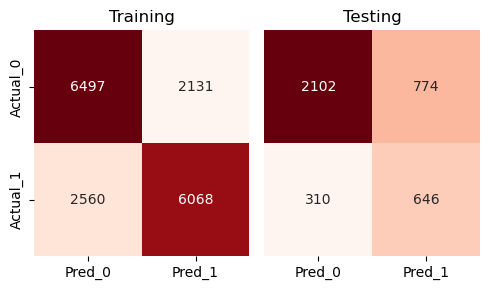

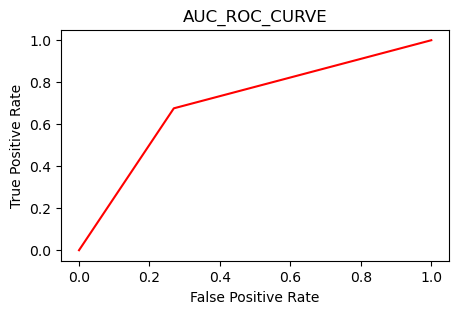

In [75]:
ada_boost = AdaBoostClassifier(n_estimators = 20)
model = model_training(ada_boost, X_train_balanced, y_train_balanced, X_test_scaled, y_test)

In [76]:
validation_scores(model, X_validation, y_validation)

**************************************************
Validation Scores are  
 
Accuracy : 0.732776617954071
Precision : 0.47465099191770754
Recall : 0.6764397905759162
F1_score : 0.5578583765112263
AUC : 0.7139585119024869


Training data scores
 
Accuracy : 0.8430690774223458
Precision : 0.8724207347760443
Recall : 0.8036624942049142
F1_score : 0.8366312741312741
AUC : 0.8430690774223458
**************************************************
Testing data scores 
 
Accuracy : 0.7604384133611691
Precision : 0.5223004694835681
Recall : 0.46548117154811713
F1_score : 0.4922566371681416
AUC : 0.6619825885556997


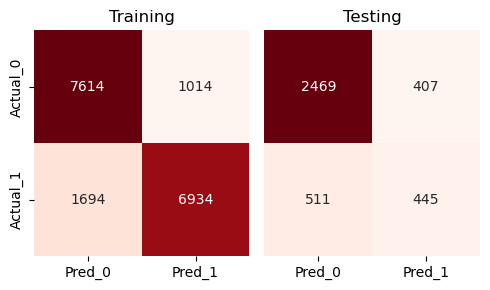

In [77]:
ada_param_grid = {
    'n_estimators': [20, 50, 100],
    'learning_rate' : [0.001, 0.01, 0.1, 1]
    }
base_estimator = DecisionTreeClassifier()
model = random_searchCV(X_train_balanced, y_train_balanced, X_test_scaled, y_test, AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth = 2)), ada_param_grid)

In [78]:
validation_scores(model, X_validation, y_validation)

**************************************************
Validation Scores are  
 
Accuracy : 0.7776617954070981
Precision : 0.5649432534678437
Recall : 0.46910994764397906
F1_score : 0.5125858123569794
AUC : 0.6745966839366924


Training data scores
 
Accuracy : 0.7271673620769588
Precision : 0.7289719626168224
Recall : 0.7232267037552156
F1_score : 0.7260879683500117
AUC : 0.7271673620769588
**************************************************
Testing data scores 
 
Accuracy : 0.6931106471816284
Precision : 0.42744063324538256
Recall : 0.6778242677824268
F1_score : 0.5242718446601942
AUC : 0.6880081005115193


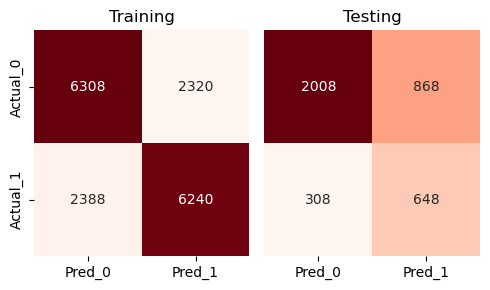

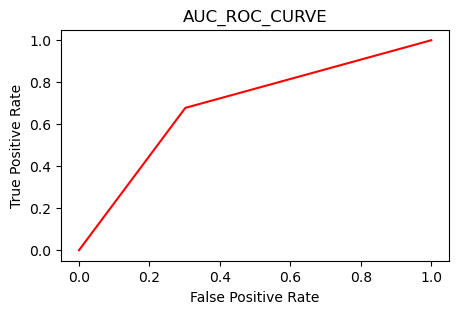

In [79]:
svm = SVC()
model = model_training(svm, X_train_balanced, y_train_balanced, X_test_scaled, y_test)

In [80]:
validation_scores(model, X_validation, y_validation)

**************************************************
Validation Scores are  
 
Accuracy : 0.6991127348643006
Precision : 0.43373493975903615
Recall : 0.6785340314136126
F1_score : 0.5291955900367497
AUC : 0.6922388613793818


Best_parameters are : {'C': 1, 'gamma': 1}
Training data scores
 
Accuracy : 0.8304937413073713
Precision : 0.8119461765671152
Recall : 0.8602225312934632
F1_score : 0.8353874725645788
AUC : 0.8304937413073714
**************************************************
Testing data scores 
 
Accuracy : 0.6745824634655533
Precision : 0.39101123595505616
Recall : 0.5460251046025104
F1_score : 0.45569620253164556
AUC : 0.6316704104375556


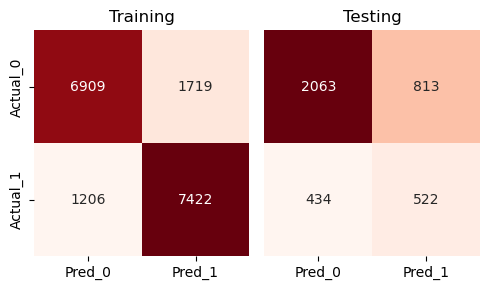

In [81]:
svm_param_grid = {
    'C' : [0.01, 0.1, 1],
    'gamma' : [0.01, 0.1, 1],
}
model = grid_searchCV(X_train_balanced, y_train_balanced, X_test_scaled, y_test, SVC(random_state = 42), svm_param_grid)

In [82]:
validation_scores(model, X_validation, y_validation)

**************************************************
Validation Scores are  
 
Accuracy : 0.677713987473904
Precision : 0.3978102189781022
Recall : 0.5706806282722513
F1_score : 0.46881720430107526
AUC : 0.6419617948451977


Training data scores
 
Accuracy : 0.6689267501159017
Precision : 0.6785495528604679
Recall : 0.6419796012980992
F1_score : 0.6597582037996546
AUC : 0.6689267501159017
**************************************************
Testing data scores 
 
Accuracy : 0.6688413361169102
Precision : 0.3989670755326017
Recall : 0.6464435146443515
F1_score : 0.4934131736526946
AUC : 0.6613650118423426


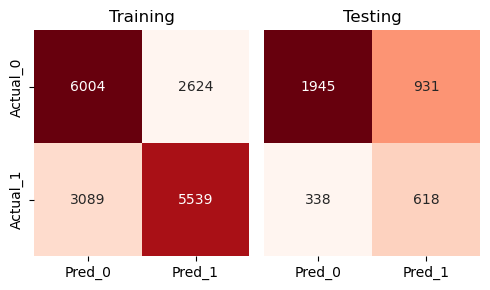

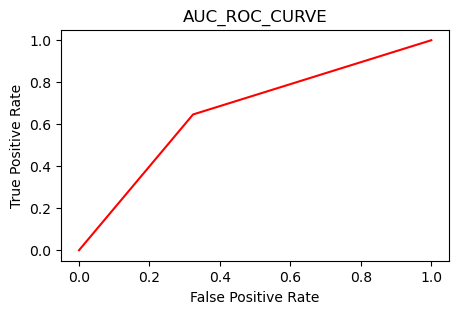

In [83]:
naive_bayes = GaussianNB()
model = model_training(naive_bayes, X_train_balanced, y_train_balanced, X_test_scaled, y_test)

In [84]:
validation_scores(model, X_validation, y_validation)

**************************************************
Validation Scores are  
 
Accuracy : 0.6907620041753654
Precision : 0.42483660130718953
Recall : 0.680628272251309
F1_score : 0.5231388329979879
AUC : 0.6873770488819979


Training data scores
 
Accuracy : 0.8240611961057024
Precision : 0.8221198156682028
Recall : 0.8270746407046824
F1_score : 0.8245897850704876
AUC : 0.8240611961057023
**************************************************
Testing data scores 
 
Accuracy : 0.7486951983298539
Precision : 0.49706129303106633
Recall : 0.6192468619246861
F1_score : 0.5514671634839311
AUC : 0.7054857397245128


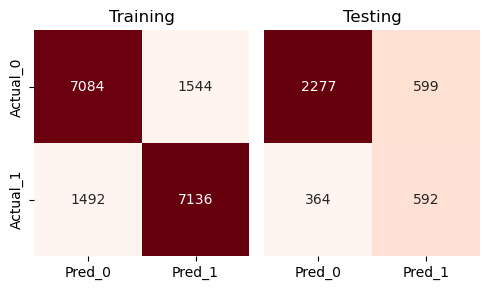

In [85]:
import xgboost as xgb

xgboost_classifier = xgb.XGBClassifier(random_state = 42, use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2,3],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

model = random_searchCV(X_train_balanced, y_train_balanced, X_test_scaled, y_test, xgboost_classifier, xgb_param_grid)

In [86]:
validation_scores(model, X_validation, y_validation)

**************************************************
Validation Scores are  
 
Accuracy : 0.774008350730689
Precision : 0.5396966993755575
Recall : 0.6335078534031413
F1_score : 0.5828516377649325
AUC : 0.7270771800905175


Training data scores
 
Accuracy : 0.7992582290217896
Precision : 0.7930095324557421
Recall : 0.8099211868335652
F1_score : 0.8013761467889908
AUC : 0.7992582290217896
**************************************************
Testing data scores 
 
Accuracy : 0.7403444676409185
Precision : 0.4850574712643678
Recall : 0.6621338912133892
F1_score : 0.5599292348518354
AUC : 0.7142380165385444


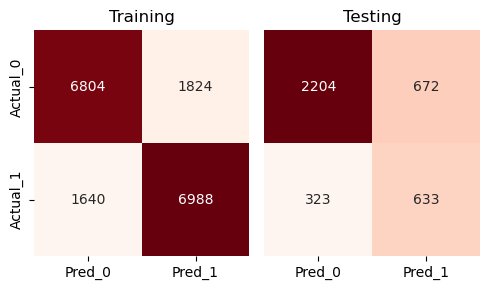

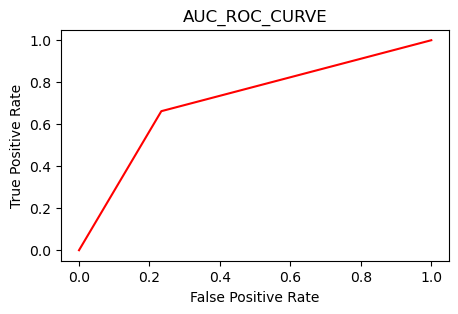

In [87]:
base_gradient = GradientBoostingClassifier(random_state = 42)
model = model_training(base_gradient, X_train_balanced, y_train_balanced, X_test_scaled, y_test)

In [88]:
validation_scores(model, X_validation, y_validation)

**************************************************
Validation Scores are  
 
Accuracy : 0.7560020876826722
Precision : 0.5080906148867314
Recall : 0.6575916230366492
F1_score : 0.5732542218165222
AUC : 0.7231301876045255


Training data scores
 
Accuracy : 0.7992582290217896
Precision : 0.7930095324557421
Recall : 0.8099211868335652
F1_score : 0.8013761467889908
AUC : 0.7992582290217896
**************************************************
Testing data scores 
 
Accuracy : 0.7403444676409185
Precision : 0.4850574712643678
Recall : 0.6621338912133892
F1_score : 0.5599292348518354
AUC : 0.7142380165385444


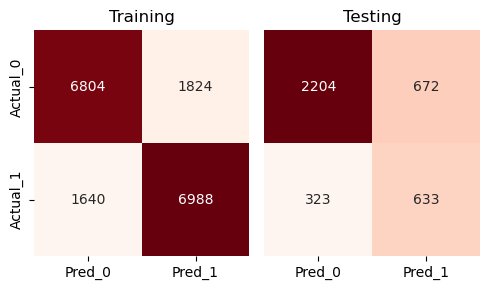

In [89]:
gradient_param_grid = {
    'n_estimators': [20, 50, 100],
    'learning_rate' : [0.001, 0.01, 0.1, 1]
    }
gradient_boosting = GradientBoostingClassifier(random_state = 42)
model = random_searchCV(X_train_balanced, y_train_balanced, X_test_scaled, y_test, gradient_boosting, gradient_param_grid)

In [90]:
validation_scores(model, X_validation, y_validation)

**************************************************
Validation Scores are  
 
Accuracy : 0.7560020876826722
Precision : 0.5080906148867314
Recall : 0.6575916230366492
F1_score : 0.5732542218165222
AUC : 0.7231301876045255


0:	learn: 0.6928074	total: 186ms	remaining: 6m 11s
100:	learn: 0.6632746	total: 4.74s	remaining: 1m 29s
200:	learn: 0.6385206	total: 9.01s	remaining: 1m 20s
300:	learn: 0.6179783	total: 13.3s	remaining: 1m 15s
400:	learn: 0.6005847	total: 17.6s	remaining: 1m 10s
500:	learn: 0.5860335	total: 22s	remaining: 1m 5s
600:	learn: 0.5734628	total: 26.5s	remaining: 1m 1s
700:	learn: 0.5624663	total: 31.1s	remaining: 57.6s
800:	learn: 0.5528967	total: 35.6s	remaining: 53.2s
900:	learn: 0.5443283	total: 40.2s	remaining: 49s
1000:	learn: 0.5368131	total: 45.2s	remaining: 45.1s
1100:	learn: 0.5296344	total: 50.5s	remaining: 41.3s
1200:	learn: 0.5231537	total: 55.4s	remaining: 36.9s
1300:	learn: 0.5172707	total: 59.9s	remaining: 32.2s
1400:	learn: 0.5117100	total: 1m 4s	remaining: 27.8s
1500:	learn: 0.5064301	total: 1m 9s	remaining: 23.2s
1600:	learn: 0.5014877	total: 1m 14s	remaining: 18.5s
1700:	learn: 0.4967713	total: 1m 19s	remaining: 13.9s
1800:	learn: 0.4922977	total: 1m 23s	remaining: 9.27s
1

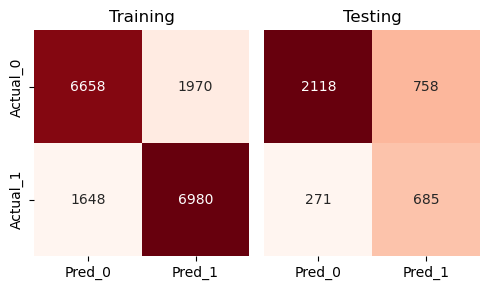

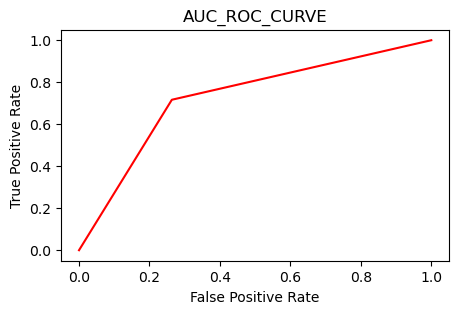

In [91]:
# Initialize the CatBoostClassifier
cat_model = CatBoostClassifier(random_state = 42,
                           iterations=2000, 
                           learning_rate=0.001, 
                           depth=10, 
                           loss_function='Logloss', 
                           verbose=100)
cat_model = model_training(cat_model, X_train_balanced, y_train_balanced, X_test_scaled, y_test)

In [92]:
validation_scores(cat_model, X_validation, y_validation)

**************************************************
Validation Scores are  
 
Accuracy : 0.7473903966597077
Precision : 0.4951816160118606
Recall : 0.6994764397905759
F1_score : 0.5798611111111112
AUC : 0.731385769426049


In [94]:
lgb_model = LGBMClassifier(boosting_type='gbdt', 
                           num_leaves=20,  # Adjusted to reduce complexity
                           max_depth=5,   # Adjusted to limit tree depth
                           learning_rate=0.01, 
                           n_estimators=300, 
                           objective='binary', 
                           subsample=0.8,  # Added to introduce randomness
                           reg_alpha=0.01,    # Increased for L1 regularization
                           reg_lambda=0.01 ,   # Increased for L2 regularization
                           random_state=42)


[LightGBM] [Info] Number of positive: 8628, number of negative: 8628
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 17256, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training data scores
 
Accuracy : 0.7921882243857209
Precision : 0.7923237476808905
Recall : 0.7919564209550302
F1_score : 0.7921400417342916
AUC : 0.792188224385721
**************************************************
Testing data scores 
 
Accuracy : 0.7458246346555324
Precision : 0.49294670846394983
Recall : 0.6579497907949791
F1_score : 0.5636200716845878
AUC : 0.7164922806547914


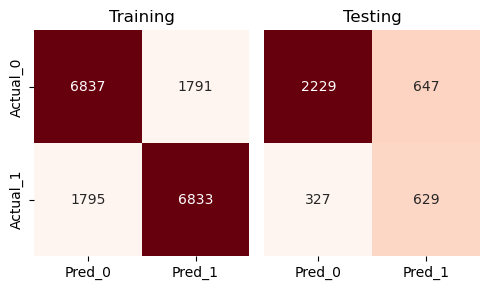

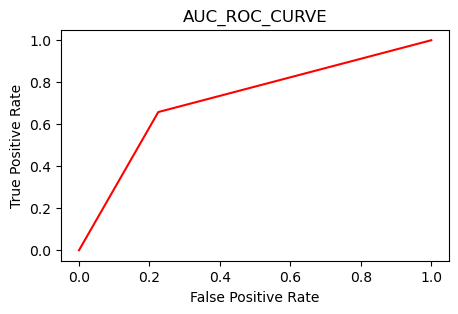

In [95]:
model = model_training(lgb_model, X_train_balanced, y_train_balanced, X_test_scaled, y_test)

In [96]:
validation_scores(model, X_validation, y_validation)

**************************************************
Validation Scores are  
 
Accuracy : 0.7515657620041754
Precision : 0.5012285012285013
Recall : 0.6408376963350786
F1_score : 0.5625
AUC : 0.7145794321091451


In [97]:
df = pd.DataFrame(index = ['Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC'])
df = pd.concat([df,scores_container('LogisticR', [0.7118997912317327,0.44581818181818184,0.6418848167539267,0.5261802575107296,0.6885127941955245])], axis = 1)
df = pd.concat([df,scores_container('Logi_Tuned', [0.7105949895615866,0.4456214689265537,0.6607329842931937,0.5322648671446647,0.6939396586394714])], axis = 1)
df = pd.concat([df,scores_container('Knn', [0.6109081419624217,0.3345679012345679,0.5675392670157068,0.42097087378640774,0.5964217016343741])], axis = 1)
df = pd.concat([df,scores_container('Base_Tree', [0.68919624217119,0.39810017271157166,0.4827225130890052,0.43634642688121156,0.6202281317617427])], axis = 1)
df = pd.concat([df,scores_container('Tree_Tuned', [0.717901878914405,0.45788770053475936,0.7172774869109948,0.5589555283557731,0.7176933141889003])], axis = 1)
df = pd.concat([df,scores_container('Base_Forest', [0.7544363256784968,0.5074152542372882,0.5015706806282723,0.5044760400210637,0.6699719930774312])], axis = 1)
df = pd.concat([df,scores_container('Forest_Tuned', [0.6283924843423799,0.3858880778588808,0.8303664921465969,0.5269102990033223,0.6958575595943273])],axis = 1)
df = pd.concat([df,scores_container('Ada_Boost', [0.732776617954071,0.47465099191770754,0.6764397905759162,0.5578583765112263, 0.7139585119024869])],axis = 1)
df = pd.concat([df,scores_container('Ada_Tuned', [0.7776617954070981,0.5649432534678437,0.46910994764397906,0.5125858123569794,0.6745966839366924])],axis = 1)
df = pd.concat([df,scores_container('SVM', [0.677713987473904,0.3978102189781022, 0.5706806282722513,0.46881720430107526,0.6419617948451977])],axis = 1)
df = pd.concat([df,scores_container('Naive_bayes', [0.6688413361169102,0.3989670755326017,0.6464435146443515,0.4934131736526946,0.6613650118423426])],axis = 1)
df = pd.concat([df,scores_container('XGboost', [0.7486951983298539,0.49706129303106633,0.6192468619246861,0.5514671634839311,0.7054857397245128])],axis = 1)
df = pd.concat([df,scores_container('Gradient_Boost', [0.7560020876826722,0.5080906148867314,0.6575916230366492,0.5732542218165222,0.7231301876045255])],axis = 1)
df = pd.concat([df,scores_container('CatBoost', [0.7473903966597077,0.4951816160118606,0.6994764397905759,0.5798611111111112,0.731385769426049])],axis = 1)
df = pd.concat([df,scores_container('Light_GBM', [0.7805323590814196,0.5556640625,0.5958115183246073,0.5750378979282466,0.7188303333715494])], axis = 1)

In [98]:
df

,LogisticR,Logi_Tuned,Knn,Base_Tree,Tree_Tuned,Base_Forest,Forest_Tuned,Ada_Boost,Ada_Tuned,SVM,Naive_bayes,XGboost,Gradient_Boost,CatBoost,Light_DBM
Accuracy,0.711900,0.710595,0.610908,0.689196,0.717902,0.754436,0.628392,0.732777,0.777662,0.677714,0.668841,0.748695,0.756002,0.747390,0.780532
Precision,0.445818,0.445621,0.334568,0.398100,0.457888,0.507415,0.385888,0.474651,0.564943,0.397810,0.398967,0.497061,0.508091,0.495182,0.555664
Recall,0.641885,0.660733,0.567539,0.482723,0.717277,0.501571,0.830366,0.676440,0.469110,0.570681,0.646444,0.619247,0.657592,0.699476,0.595812
F1_score,0.526180,0.532265,0.420971,0.436346,0.558956,0.504476,0.526910,0.557858,0.512586,0.468817,0.493413,0.551467,0.573254,0.579861,0.575038
AUC,0.688513,0.693940,0.596422,0.620228,0.717693,0.669972,0.695858,0.713959,0.674597,0.641962,0.661365,0.705486,0.723130,0.731386,0.718830


### Observations On Data

- The dataset is very imbalanced as it contains the ratio's in the output variable are {0:>75%, 1:<25%}.
- There are only two continous variables and they both has been skewed and have outliers.
- There are significant missing values in company_details features(Imputed all the missing values with the most  frequent value of that particular column).
- As i didn't see any trend or relationship between gender and target variable, dropped gender column.
- 'City' names are also unknown in the dataset.

### Model Performance

**Low Performing models:** 
- (i) F1_Score is low for most of the models, but Accuracy_score and AUC_Scores are considerable for most of the modles.
- (ii) As the data we have is imbalanced, even after applying Oversampling(SMOTE) techniques, models are biased towards class_0.
- (iii) Knn, Knn_Tuned, Base_DecisionTree, RandomForest models are overfitted as they are performig well on traing data but not on testing and validation datasets.
- (iv) SVM, AdaBoost models are also overfitted.

**Best Performed models:**

- (i) Most of the models are  giving low scores in terms of Recall, Prescision and F1_score.since it is a classification problem, we cannot take accuracy as a performance metric.
- (ii) Both GradientBoosting algoritm and CatBoost models are giving similar kind of scores on validation dataset and they are not overfitted on traing data.
- (iii) LightGBM is also has good accuracy_score, but it is giving less Recall_score comparing with the above two models.
- (iv) CatBoost Algorithm is taking a less time comparing with AdaBoostClassifier Model.
- (v) So, the best performer among all the models is "CatBoost"
[Accuracy = 0.7473903966597077, Precision = 0.4951816160118606, Recall = 0.6994764397905759, F1_score = 0.5798611, AUC_roc_Score = 0.731385769426049.]

### Conclusion and Recomondations to the company

- From the analysis, the candidates who are working in a company from last 2 to 3 years are most likely to leave their job.
- Knowing the actual names of the city might helpful since Location will also plays a key role in selecting a job.
- Candidates who took full_time course are likely to leave their current job.